In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 224, 224

weights_path = '/home/mksnkv/models/top_tuned/vgg16/snils_model_mcp.h5'
evaluation_data_dir = '/home/mksnkv/Documents/classification/snils_2class_divided_clean/evaluation'
model = load_model(weights_path)


datagen = ImageDataGenerator(rescale = 1. / 255)
generator = datagen.flow_from_directory(
        evaluation_data_dir,
        target_size=(img_width, img_height),
        batch_size=1,
        class_mode='binary',
        shuffle=False)

model.evaluate(generator)

Found 490 images belonging to 2 classes.
  ...
    to  
  ['...']
490/490 [==============================] - 51s 104ms/step - loss: 0.0338 - accuracy: 0.9878


[0.03376783195089636, 0.9877551]

In [3]:
generator.reset()
Y_pred = model.predict_generator(generator, 490)

Instructions for updating:
Please use Model.predict, which supports generators.


In [4]:
y_pred = np.where(Y_pred < 0.5, 0, 1)
# print(Y_pred)
# print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(generator.classes, y_pred))
print('Classification Report')
target_names = ['non-snils', 'snils']
print(classification_report(generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[242   3]
 [  3 242]]
Classification Report
              precision    recall  f1-score   support

   non-snils       0.99      0.99      0.99       245
       snils       0.99      0.99      0.99       245

    accuracy                           0.99       490
   macro avg       0.99      0.99      0.99       490
weighted avg       0.99      0.99      0.99       490



In [6]:
dover_dir = '/home/mksnkv/Documents/classification/dover_2class_divided_clean/evaluation/dover/'
ndfl_dir = '/home/mksnkv/Documents/classification/ndfl_2class_divided_clean/evaluation/ndfl/'
snils_dir = '/home/mksnkv/Documents/classification/snils_2class_divided_clean/evaluation/snils/'
sved_dir = '/home/mksnkv/Documents/classification/sved_2class_divided_clean/train/sved/'
passport_dir = '/home/mksnkv/Documents/classification/passport_2class_divided_clean/evaluation/passport/'

eval_dir = '/home/mksnkv/Documents/classification/snils_2class_divided_clean/evaluation/non-snils/'

error_counter = 0
directory = snils_dir
images = os.listdir(directory)

filenames = []
imgs = []
for name in images:
    path = directory + name
    img_full = image.load_img(path)
    img = image.load_img(path, target_size=(img_width, img_height))
    img = np.expand_dims(img, axis=0)
    img = img / 255
    classes = model.predict(img)
#     print(classes)
    if classes < 0.5:
        error_counter = error_counter + 1
        filenames.append(name)
        imgs.append(img_full)
        info = str(error_counter) + "/" + str(len(images))  + " name: " + name + " confidence:" + str(float(classes[0]))
        print(info)

1/245 name: snils482.jpg confidence:0.4491082727909088
2/245 name: snils487.jpg confidence:0.3660796284675598
3/245 name: snils460.jpg confidence:0.0394774004817009


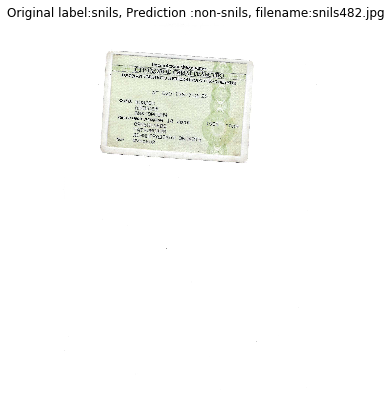

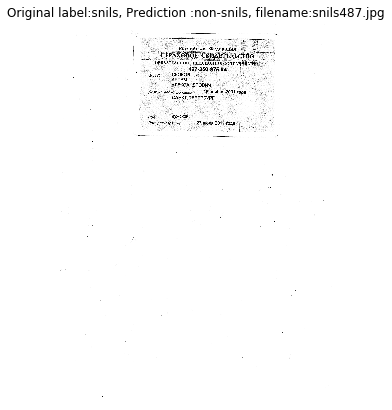

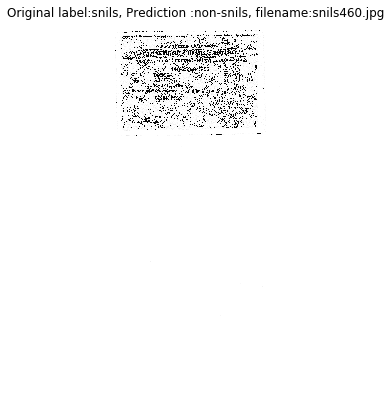

In [7]:
dir_split = directory.split("/")
original_label = dir_split[len(dir_split) - 2]
for i in range(len(filenames)):
    title = 'Original label:{}, Prediction :{}, filename:{}'.format(
        original_label,
        "non-" + original_label,
        filenames[i]
        )
    image = imgs[i]
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(image)
    plt.show()